In [70]:
import pandas as pd
from cross_match import query_panstarrs1, query_allwise, query_twomass
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt

In [95]:
def allwise_cross_match(obj_ids: np.array) -> pd.DataFrame:
    query: str = f'''SEL
      allwise_best_neighbour.source_id, 
      allwise_best_neighbour.original_ext_source_id, 
      allwise_best_neighbour.angular_distance 
      FROM gaiadr3.gaia_source JOIN gaiadr3.allwise_best_neighbour ON gaia_source.source_id=allwise_best_neighbour.source_id
      WHERE gaia_source.source_id IN ({', '.join([str(o) for o in obj_ids])});
    '''
        
        # 
        
    print('Executing query:')
    print(query)
    
    job = Gaia.launch_job_async(query, output_format='csv')
    
    return job.get_results().to_pandas().rename(columns={
        'original_ext_source_id': 'allwise_id',
        'angular_distance': 'allwise_angular_distance'
    })

In [92]:
clustered = pd.read_csv('./clustered_pyupmask.csv')
clustered.head()

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,...,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,label,BP_err,RP_err,G_err,E(B_V),A_G,A_BP,A_RP,A_g,A_r,A_i,A_z,A_y,A_J,A_H,A_K,color,color_error,mag_abs,mag_abs_error
0,28257,1636148068921376768,Gaia DR3 573351475155035008,573351475155035008,236544348,2016.0,13.267578,0.474411,84.456973,0.483350,0.519350,0.508918,1.020500,2.804103,-2.668012,0.592360,-0.862964,0.690405,-0.000836,-0.014544,-0.264932,-0.105069,0.004152,-0.108395,-0.425609,-0.172952,0.211935,0.000608,293,0,292,1,1.888293,354.99142,1.437166,0.948938,95,False,NaN,1.534372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.158200,0.062628,0.005841,0.15,0.381477,0.494195,0.289386,1.635870,1.216905,0.916515,0.720285,0.587295,0.368605,0.218085,0.140709,1.603039,0.170145,8.676971,2.127860
1,28274,1636148068921376768,Gaia DR3 573352398572667392,573352398572667392,1496645516,2016.0,12.993639,0.105877,84.541275,0.101403,0.535779,0.114538,4.677740,4.205006,-4.068359,0.139446,-1.063267,0.132520,-0.101698,0.010705,-0.160159,-0.066496,0.078634,-0.076028,-0.117923,-0.025069,0.224157,-0.118482,393,0,391,2,2.159523,467.60144,0.318427,0.774152,31,False,1.419690,NaN,...,4243.6070,4.8388,4.6493,4.9081,-1.3441,-1.5153,-1.0632,1118.0850,1005.1202,1528.6139,0.0149,0.0032,0.0408,0.0112,0.0024,0.0307,0.0060,0.0013,0.0165,PHOENIX,0,0.025766,0.015335,0.001740,0.11,0.279750,0.362410,0.212217,1.199638,0.892397,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,1.313450,0.029984,6.871222,0.464217
2,28314,1636148068921376768,Gaia DR3 573354670612121088,573354670612121088,1494711348,2016.0,12.852203,0.035797,84.583456,0.034287,0.567896,0.040473,14.031438,1.740218,-1.657933,0.045180,-0.528789,0.043668,0.002272,0.108110,-0.128270,-0.056491,0.149243,-0.096022,-0.019338,-0.036826,0.263473,-0.039099,377,0,373,4,-0.242103,376.16080,0.000000,0.000000,31,False,1.519221,NaN,...,5444.7163,4.6084,4.5931,4.6266,-0.7363,-0.7960,-0.6855,1311.0486,1271.5338,1346.1329,0.2122,0.1884,0.2356,0.1746,0.1549,0.1940,0.0944,0.0837,0.1049,MARCS,0,0.004852,0.004647,0.000521,0.11,0.279750,0.362410,0.212217,1.199638,0.892397,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,0.828158,0.006719,5.087451,0.154759
3,28351,1636148068921376768,Gaia DR3 573356251160187648,573356251160187648,1580589992,2016.0,14.600912,0.043472,84.598119,0.042857,0.536947,0.048662,11.034314,1.733513,-1.653169,0.050184,-0.521631,0.059418,-0.124984,0.116658,-0.124359,-0.087725,0.045924,-0.101070,0.015275,-0.061997,0.253305,-0.097301,341,0,341,0,-0.171119,345.29462,0.000000,0.000000,31,False,1.487878,NaN,...,4842.3660,4.4031,4.3823,4.4354,-0.9833,-1.0455,-0.9264,1637.1993,1563.2145,1684.5035,0.0234,0.0064,0.0538,0.0186,0.0050,0.0428,0.0100,0.0027,0.0230,PHOENIX,0,0.007816,0.003751,0.000664,0.14,0.356045,0.461249,0.270094,1.526812,1.135778,0.855414,0.672266,0.548142,0.344032,0.203546,0.131328,0.925355,0.008670,5.193372,0.196794
4,28407,1636148068921376768,Gaia DR3 573358072225488640,573358072225488640,1042182307,2016.0,15.209703,0.548097,84.651333,0.534833,0.485922,0.612130,0.793822,3.000391,-2.097656,0.6

In [93]:
clustered.shape

(1358, 173)

In [96]:
allwise = allwise_cross_match(clustered.source_id.values[:4])

Executing query:

      allwise_best_neighbour.source_id, 
      allwise_best_neighbour.original_ext_source_id, 
      allwise_best_neighbour.angular_distance 
      FROM gaiadr3.gaia_source JOIN gaiadr3.allwise_best_neighbour ON gaia_source.source_id=allwise_best_neighbour.source_id
      WHERE gaia_source.source_id IN (573351475155035008, 573352398572667392, 573354670612121088, 573356251160187648);
    
500 Error 500:
null


HTTPError: Error 500:
null

In [80]:
clustered['panstarrs1_id'] = panstarrs1.panstarrs1_id

In [81]:
panstarrs1.columns

Index(['source_id', 'source_id_1', 'panstarrs1_id',
       'panstarrs1_angular_distance'],
      dtype='object')

In [82]:
panstarrs1.head()

,source_id,source_id_1,panstarrs1_id,panstarrs1_angular_distance
0,573351475155035008,573351475155035008,209340132674899194,0.020046
1,573352398572667392,573352398572667392,209450129933040329,0.019871
2,573354670612121088,573354670612121088,209500128518670957,0.020310
3,573356251160187648,573356251160187648,209510146005218527,0.004474
4,573358072225488640,573358072225488640,209580152097122388,0.018643


In [83]:
panstarrs1_photometry = query_allwise(panstarrs1.panstarrs1_id.values)

In [61]:
panstarrs1_photometry

,objID,RAMean,DecMean,nDetections,gMeanPSFMag,gMeanPSFMagErr,rMeanPSFMag,rMeanPSFMagErr,iMeanPSFMag,iMeanPSFMagErr,zMeanPSFMag,zMeanPSFMagErr,yMeanPSFMag,yMeanPSFMagErr
0,210240114000400506,11.399906,85.199754,78,17.523001,0.005469,16.893299,0.002513,16.635201,0.003676,16.516100,0.005024,16.462299,0.007450
1,210240114688838888,11.468740,85.206749,77,16.035500,0.003883,15.600900,0.001700,15.440600,0.001598,15.396200,0.003957,15.380400,0.002856
2,210240114744882744,11.474304,85.201620,81,16.442200,0.002540,15.986000,0.001972,15.810800,0.002738,15.777400,0.003015,15.744200,0.005810
3,210240114869245961,11.486773,85.204310,75,18.043800,0.005234,17.370399,0.003863,17.102400,0.003849,17.013300,0.004379,16.969101,0.010519
4,210240114877718561,11.487628,85.206475,77,15.113800,0.005182,14.690000,0.001116,14.533600,0.000587,14.495700,0.005491,14.467600,0.001186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,210990156603563409,15.660416,85.827158,59,18.454800,0.011503,17.747900,0.009041,17.432899,0.005091,17.296200,0.004861,17.191500,0.026251
1271,211030074674168562,7.467478,85.864763,56,19.910200,0.051741,18.688801,0.006785,18.108900,0.005804,17.851500,0.010076,17.722000,0.014892
1272,211040150420130561,15.042043,85.866455,50,20.870300,0.062364,19.973801,0.015198,19.516600,0.016741,19.235100,0.024640,18.836100,0.244339
1273,211060114760993947,11.476885,85.885936,53,20.830000,0.005523,19.635599,0.021628,19.053101,0.012907,18.780199,0.022808,18.656200,0.029853


In [84]:
sources = pd.merge(clustered, panstarrs1_photometry, left_on='panstarrs1_id', right_on='objID', how='left')

In [85]:
sources.head()

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,...,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,label,BP_err,RP_err,G_err,E(B_V),A_G,A_BP,A_RP,A_g,A_r,A_i,A_z,A_y,A_J,A_H,A_K,color,color_error,mag_abs,mag_abs_error,panstarrs1_id,objID,RAMean,DecMean,nDetections,gMeanPSFMag,gMeanPSFMagErr,rMeanPSFMag,rMeanPSFMagErr,iMeanPSFMag,iMeanPSFMagErr,zMeanPSFMag,zMeanPSFMagErr,yMeanPSFMag,yMeanPSFMagErr
0,28257,1636148068921376768,Gaia DR3 573351475155035008,573351475155035008,236544348,2016.0,13.267578,0.474411,84.456973,0.483350,0.519350,0.508918,1.020500,2.804103,-2.668012,0.592360,-0.862964,0.690405,-0.000836,-0.014544,-0.264932,-0.105069,0.004152,-0.108395,-0.425609,-0.172952,0.211935,0.000608,293,0,292,1,1.888293,354.99142,1.437166,0.948938,95,False,NaN,1.534372,...,NaN,NaN,NaN,NaN,NaN,0,0.158200,0.062628,0.005841,0.15,0.381477,0.494195,0.289386,1.635870,1.216905,0.916515,0.720285,0.587295,0.368605,0.218085,0.140709,1.603039,0.170145,8.676971,2.127860,2.093401e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28274,1636148068921376768,Gaia DR3 573352398572667392,573352398572667392,1496645516,2016.0,12.993639,0.105877,84.541275,0.101403,0.535779,0.114538,4.677740,4.205006,-4.068359,0.139446,-1.063267,0.132520,-0.101698,0.010705,-0.160159,-0.066496,0.078634,-0.076028,-0.117923,-0.025069,0.224157,-0.118482,393,0,391,2,2.159523,467.60144,0.318427,0.774152,31,False,1.419690,NaN,...,0.0307,0.0060,0.0013,0.0165,PHOENIX,0,0.025766,0.015335,0.001740,0.11,0.279750,0.362410,0.212217,1.199638,0.892397,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,1.313450,0.029984,6.871222,0.464217,2.094501e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28314,1636148068921376768,Gaia DR3 573354670612121088,573354670612121088,1494711348,2016.0,12.852203,0.035797,84.583456,0.034287,0.567896,0.040473,14.031438,1.740218,-1.657933,0.045180,-0.528789,0.043668,0.002272,0.108110,-0.128270,-0.056491,0.149243,-0.096022,-0.019338,-0.036826,0.263473,-0.039099,377,0,373,4,-0.242103,376.16080,0.000000,0.000000,31,False,1.519221,NaN,...,0.1940,0.0944,0.0837,0.1049,MARCS,0,0.004852,0.004647,0.000521,0.11,0.279750,0.362410,0.212217,1.199638,0.892397,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,0.828158,0.006719,5.087451,0.154759,2.095001e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28351,1636148068921376768,Gaia DR3 573356251160187648,573356251160187648,1580589992,2016.0,14.600912,0.043472,84.598119,0.042857,0.536947,0.048662,11.034314,1.733513,-1.653169,0.050184,-0.521631,0.059418,-0.124984,0.116658,-0.124359,-0.087725,0.045924,-0.101070,0.015275,-0.061997,0.253305,-0.097301,341,0,341,0,-0.171119,345.29462,0.000000,0.000000,31,False,1.487878,NaN,...,0.0428,0.0100,0.0027,0.0230,PHOENIX,0,0.007816,0.003751,0.000664,0.14,0.356045,0.461249,0.270094,1.526812,1.135778,0.855414,0.672266,0.548142,0.344032,0.203546,0.131328,0.925355,0.008670,5.193372,0.196794,2.095101e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28407,1636148068921376768,Gaia DR3 573358072225488640,573358072225488640,1042182307,2016.0,15.209703,0.548097,84.651333,0.534833,0.485922,0.612130,0.793822,3.000391,-2.097656,0.651059,-2.145271,0.932689,-0.163610,0.016872,-0.131176,-0.021919,-0.030400,-0.021503,0.056172,-0.073325,0.231673,-0.105149,235,0,234,1,-1.830753,215.71294,0.000000,0.000000,95,False,NaN,1.203336,...,NaN,NaN,NaN,NaN,NaN,0,0.

In [86]:
sources = sources[sources.gMeanPSFMag-sources.iMeanPSFMag>-100]

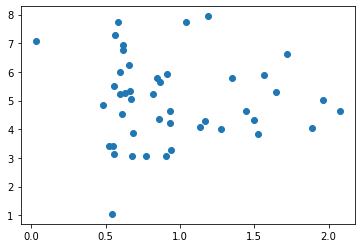

In [87]:
plt.scatter(sources.gMeanPSFMag-sources.iMeanPSFMag, sources.mag_abs)